In [67]:
%matplotlib inline
from matplotlib import gridspec

import re
import math
import os.path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from miran import *

sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
sns.set_palette("Reds_d", 5); my_palette='Reds'; libcolor='Reds'
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

def get_scores_from_xlsx(list_of_excel_files):
    
    cor = []
    nei = []
    rel = []
    wei = [] 
    par = []

    for f in list_of_excel_files:
        df = pd.read_excel(f, sheetname=3).T
        cor.append(float(df.correct))
        nei.append(float(df.fifth))
        rel.append(float(df.relative))
        par.append(float(df.parallel))
        wei.append(float(df.weighted))
    return [cor, nei, rel, par, wei]


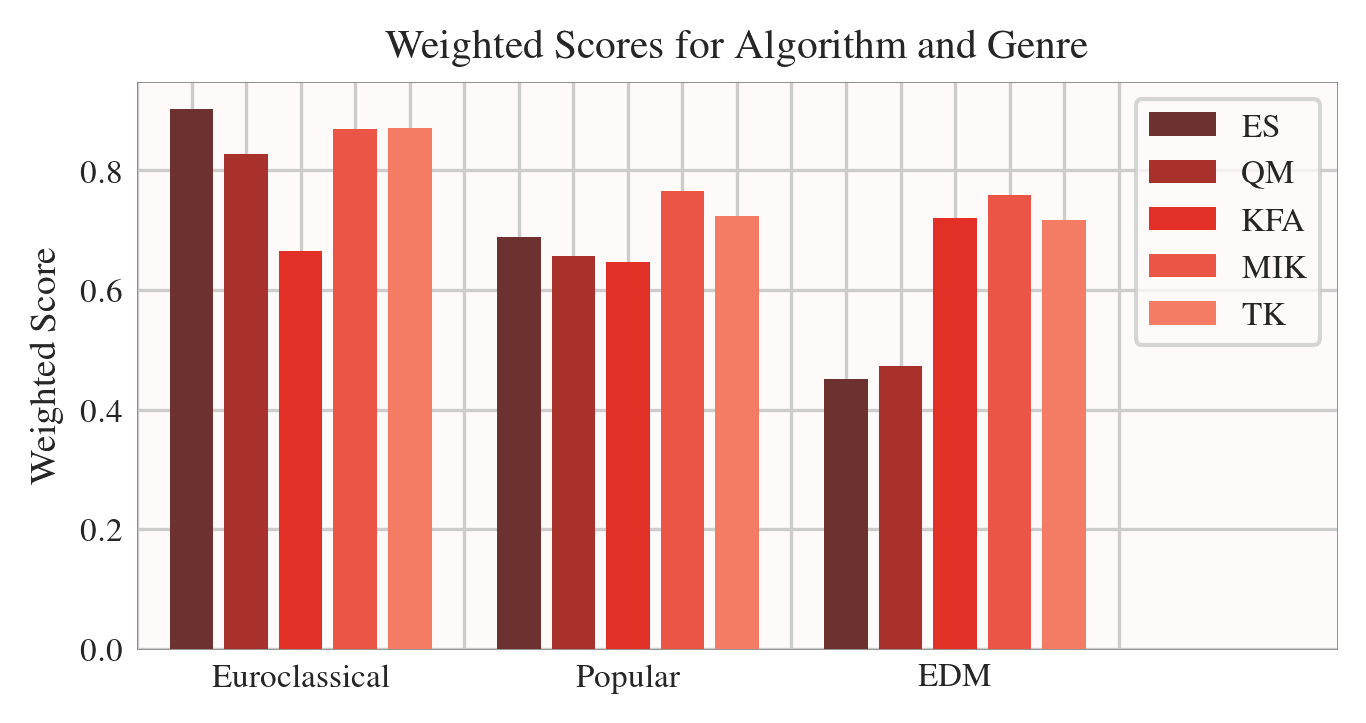

In [70]:
es = [0.9021, 0.6893,0.4517]
kfa = [0.6646, 0.6465,0.7208]
mik = [0.8698, 0.7662,0.7582]
qm = [0.8281, 0.6571,0.4732]
tk = [0.8708, 0.7231,0.7179]

plt.figure(figsize=(5.16, 2.5), dpi=150)
plt.title("Weighted Scores for Algorithm and Genre", fontsize=10)

#plt.xlabel('Musical Genre')
plt.ylabel('Weighted Score')
plt.xlim([0,22])
plt.xticks(range(19), ('','','','Euroclassical','','','','','','Popular','','','','','','EDM','','',''))
plt.bar(range(1,19,6), es, label='ES', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(2,19,6), qm, label='QM', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(3,19,6), kfa, label='KFA', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(4,19,6), mik, label='MIK', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(5,19,6), tk, label='TK', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
#plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures//weighted_genres.pdf', format="pdf", dpi=1200)

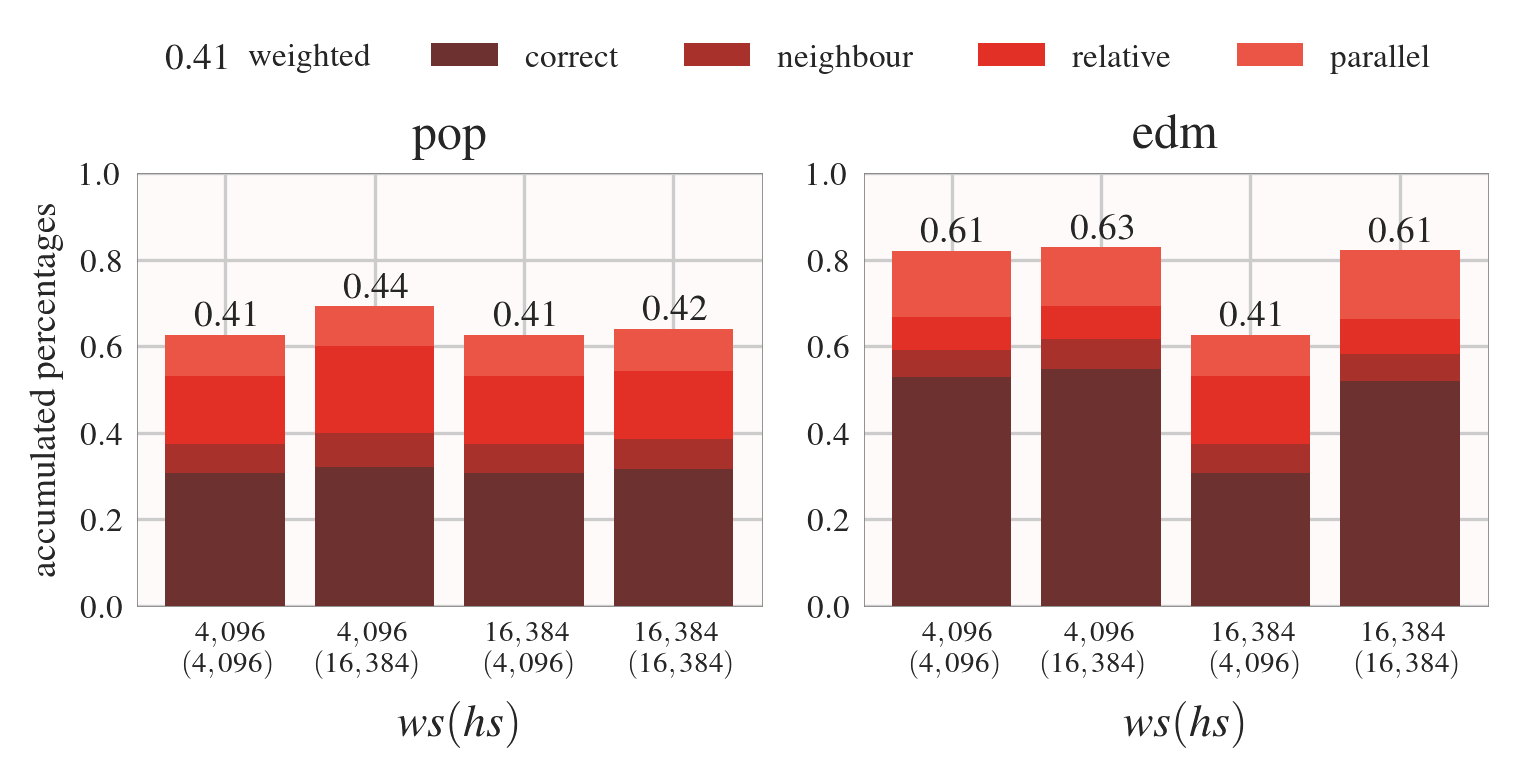

In [78]:
# TEMPERLEYS AND SHAAT PROFILES VERY BASIC!!!!
#sns.set_palette("Blues_r")
plt.figure(figsize=(5.16, 2), dpi=150)
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-4096-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-4096-16384.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-16384-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-16384-16384.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,1)
plt.title('pop')
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('', '', '', ''))
plt.text(-0.2,-0.08, '$4,096$', fontsize=7)
plt.text(0.75,-0.08,  '$4,096$', fontsize=7)
plt.text(1.75,-0.08,  '$16,384$', fontsize=7)
plt.text(2.75,-0.08,  '$16,384$', fontsize=7)
plt.text(-0.28,-0.15, '$(4,096)$', fontsize=7)
plt.text(0.6,-0.15,  '$(16,384)$', fontsize=7)
plt.text(1.73,-0.15,  '$(4,096)$', fontsize=7)
plt.text(2.70,-0.15,  '$(16,384)$', fontsize=7)

#plt.text(1.15,-0.3,  '$ws(hs)$', fontsize=11)
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.24,  '0.41', fontsize=9)    
plt.text(0.15, 1.25,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)


a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-4096-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-4096-16384.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-16384-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-16384-16384.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,2)
plt.title("edm")
plt.ylim([0,1])
plt.xticks(range(len(a[0])), ('', '', '', ''))
plt.text(-0.2,-0.08, '$4,096$', fontsize=7)
plt.text(0.75,-0.08,  '$4,096$', fontsize=7)
plt.text(1.75,-0.08,  '$16,384$', fontsize=7)
plt.text(2.75,-0.08,  '$16,384$', fontsize=7)
plt.text(-0.28,-0.15, '$(4,096)$', fontsize=7)
plt.text(0.6,-0.15,  '$(16,384)$', fontsize=7)
plt.text(1.73,-0.15,  '$(4,096)$', fontsize=7)
plt.text(2.70,-0.15,  '$(16,384)$', fontsize=7)
#plt.text(1.15,-0.3,  '$ws(hs)$', fontsize=11)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_1.pdf', format="pdf", dpi=1200, bbox_inches='tight')

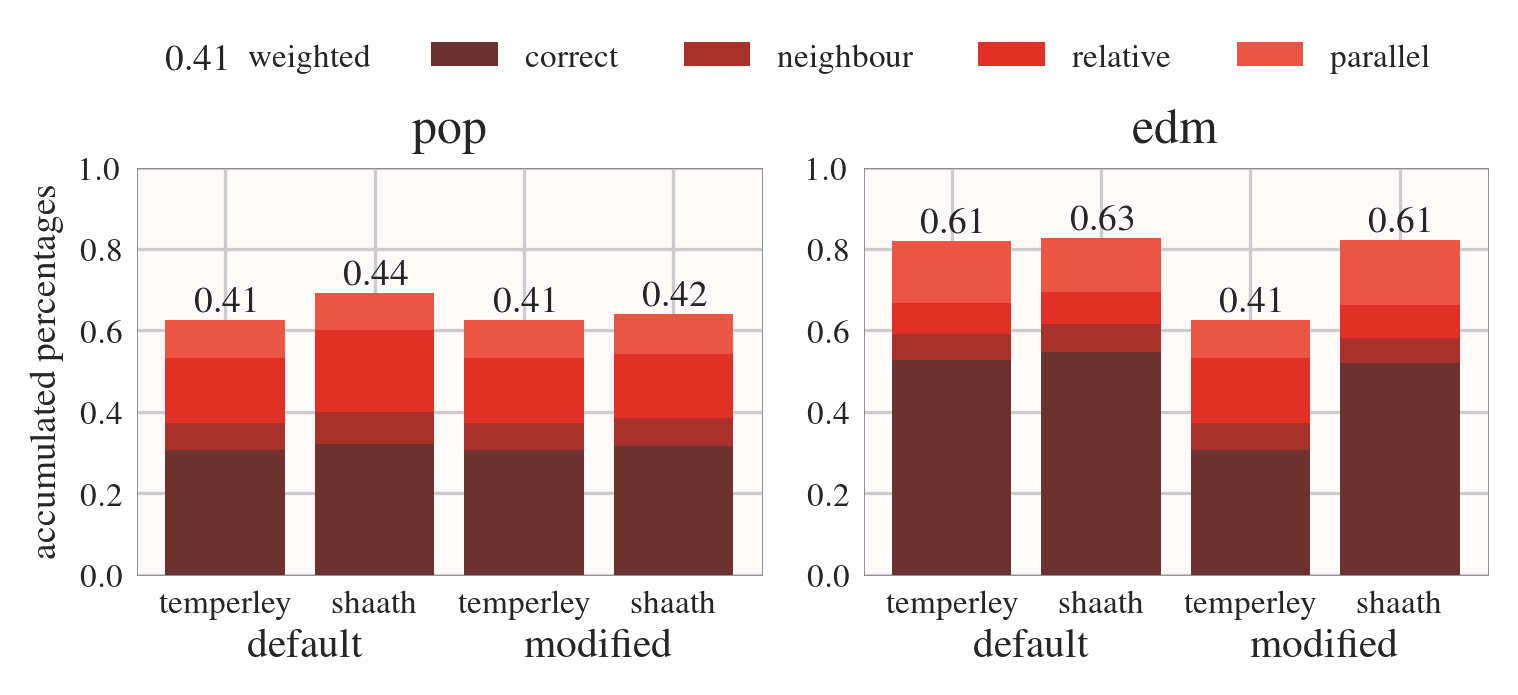

In [92]:
# TEMPERLEYS AND SHAAT PROFILES VERY BASIC!!!!
#sns.set_palette("Blues_r")
plt.figure(figsize=(5.16, 2), dpi=150)
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-4096-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-4096-16384.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-16384-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-temperley-16384-16384.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,1)
plt.title('pop')
plt.ylim([0,1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), ('temperley', 'shaath', 'temperley', 'shaath'))
# plt.text(-0.2,-0.08, '$temperley$', fontsize=7)
# plt.text(0.75,-0.08,  '$shaath$', fontsize=7)
# plt.text(1.75,-0.08,  '$temperley$', fontsize=7)
# plt.text(2.75,-0.08,  '$shaat$', fontsize=7)
plt.text(0.15, -0.2, 'default', fontsize=10)
# #plt.text(0.6,-0.15,  '$(16,384)$', fontsize=7)
plt.text(2,-0.2,  'modified', fontsize=10)
# #plt.text(2.70,-0.15,  '$(16,384)$', fontsize=7)

#plt.text(1.15,-0.3,  '$ws(hs)$', fontsize=11)
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.text(-0.4, 1.24,  '0.41', fontsize=9)    
plt.text(0.15, 1.25,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)


a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-4096-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-4096-16384.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-16384-4096.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/ECIR/GS_ECIR-shaath-16384-16384.xlsx'])

cor, nei, rel, par, wei = a

plt.subplot(1,2,2)
plt.title("edm")
plt.ylim([0,1])
plt.xticks(range(len(a[0])), ('temperley', 'shaath', 'temperley', 'shaath'))
# plt.text(-0.2,-0.08, '$temperley$', fontsize=7)
# plt.text(0.75,-0.08,  '$shaath$', fontsize=7)
# plt.text(1.75,-0.08,  '$temperley$', fontsize=7)
# plt.text(2.75,-0.08,  '$shaat$', fontsize=7)
plt.text(0.15, -0.2, 'default', fontsize=10)
# #plt.text(0.6,-0.15,  '$(16,384)$', fontsize=7)
plt.text(2,-0.2,  'modified', fontsize=10)
# #plt.text(2.70,-0.15,  '$(16,384)$', fontsize=7)
# plt.xticks(range(len(a[0])), ('temperley', 'shaath', 'temperley', 'shaath'))
# plt.text(-0.2,-0.08, '$4,096$', fontsize=7)
# plt.text(0.75,-0.08,  '$4,096$', fontsize=7)
# plt.text(1.75,-0.08,  '$16,384$', fontsize=7)
# plt.text(2.75,-0.08,  '$16,384$', fontsize=7)
# plt.text(-0.28,-0.15, '$(4,096)$', fontsize=7)
# plt.text(0.6,-0.15,  '$(16,384)$', fontsize=7)
# plt.text(1.73,-0.15,  '$(4,096)$', fontsize=7)
# plt.text(2.70,-0.15,  '$(16,384)$', fontsize=7)
# #plt.text(1.15,-0.3,  '$ws(hs)$', fontsize=11)

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_1.pdf', format="pdf", dpi=1200, bbox_inches='tight')